<h1 align=center><font size = 5>YD's Data Analysis Note and Practice (Python)</font></h1>

<h2> Summary </h2>

This notebook summarises the learning from Coursera "Data Analysis with Python"

### Scientific Libraries:
  - Pandas  
  - NumPy   
  - SciPy
  
### Visualization Libraries:
  - matplotlib
  - Seaborn
  
### Algorithms:
  - scikit-learn
    - Linear regression
    - Classification
    - Clustering
  - Statsmodels

## Steps for Data 
### 1. Import Data 
  - .read_csv(), .columns = headers (if no headers)
  
### 2. Understanding Data 
  - df.describe(), df.info()
  
### 3. Identifying missing values 
  - find '?', N/A, blank cell, 0, NaN etc
  
### 4. Handle missing values 
  - drop or replace
  
### 5. Data standardization 
  - i.e. N.Y, New York all to New York
  - change data type - .dtype(), .astype()
  
### 6. Data normalization 
  - mean, min-max, z-score
  
### 7. Binning 
  - group values into categories (into bins)
  
### 8. Turn categorical variable to quantitative variable 
  - .get_dummies(df[' '])

In [88]:
# import libraries that will be used
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot

# Using Pandas to import data
# assign file path
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

# read the file as csv using .read_csv(filepath) as dataframe
df = pd.read_csv(url, header = None)

# Show the first 5 rows using .head() or last 5 rows using .tail()
df.head()
# df.tail()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [89]:
# As there is no header, have to add in header
# headers names are given as list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

# assign the headers to the columns using .columns
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [95]:
# identify if there is missing values in column 'price'
# Missing values --> '?', 'N/A', 0, a blank cell, NaN

# check the data
df['price'].value_counts()
# from the value_counts, there are 4 '?'s which are invalid

# convert '?' to NaN
df['price'].replace("?",np.nan, inplace=True)

In [96]:
# check the df after replacement
df

# Drop the missing values from 'price'
df.dropna(subset=["price"], axis = 0, inplace = True)

# Check again the shape of df
# df.shape


In [97]:
# reshape index because we have dropped values
# df.reset_index(drop = True, inplace = True)

# Check again the df
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [98]:
# Check the df sumary using df.info()/df.describe(include = 'all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    201 non-null object
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-nul

In [99]:
# Convert other '?' into NaN
df.replace('?', np.nan, inplace = True)

# use isnull() function to check missing values and assign it to a new var
missing_val = df.isnull()
missing_val.head()



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [100]:
# check the number of missing values (True and False) in each column
missing_val = df.isnull()
for col in missing_val.columns.values.tolist():
    print(col)
    print(missing_val[col].value_counts())
    print('')

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
Fa

In [101]:
# some Null values are found in 
# 'normalized-losses' : 37
# 'num-of-doors' : 2
# 'bore' : 4
# 'stroke' : 4
# 'horsepower' : 2
# 'peak-rpm' : 2

# 'num-of-doors' is object type, we may replace it with the most common value
df['num-of-doors'].value_counts()

# or use the below to find the most common value directly
df['num-of-doors'].value_counts().idxmax()

# Replace num-of-doors with the most common value 'four'
df['num-of-doors'].replace(np.nan, 'four', inplace = True)

# Check num-of-doors column null value again
df['num-of-doors'].isnull().value_counts()


False    201
Name: num-of-doors, dtype: int64

In [102]:
# The rest should replace using mean values
# 'normalized-losses'
mean = df['normalized-losses'].astype('float').mean(axis=0)
print("Mean value of normalized-losses: ",mean)
df['normalized-losses'].replace(np.nan, mean, inplace = True)

Mean value of normalized-losses:  122.0


In [103]:
# replace 'bore'
mean = df['bore'].astype('float').mean(axis=0)
print("Mean value of bore: ",mean)
df['bore'].replace(np.nan, mean, inplace = True)

Mean value of bore:  3.330710659898477


In [104]:
# replace 'stroke'
mean = df['stroke'].astype('float').mean(axis=0)
print("Mean value of stroke: ",mean)
df['stroke'].replace(np.nan, mean, inplace = True)

Mean value of stroke:  3.256903553299492


In [105]:
# replace 'horsepower'
mean = df['horsepower'].astype('float').mean(axis=0)
print("Mean value of horsepower: ",mean)
df['horsepower'].replace(np.nan, mean, inplace = True)

Mean value of horsepower:  103.39698492462311


In [106]:
# replace 'peak-rpm'
mean = df['peak-rpm'].astype('float').mean(axis=0)
print("Mean value of peak-rpm: ",mean)
df['peak-rpm'].replace(np.nan, mean, inplace = True)

Mean value of peak-rpm:  5117.587939698493


In [107]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [108]:
# after replacing values, we should correct the format
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [109]:
# Some data types are found to be not correct, i.e. 
# normalized-losses
# bore
# stroke
# horsepower
# peak-rpm
# price

# Change the data type using .astype('int' or 'float' or 'str')
df[['bore','stroke','horsepower','peak-rpm']] = df[['bore','stroke','horsepower','peak-rpm']].astype('float')
df['normalized-losses'] = df['normalized-losses'].astype('int')
df['price'] = df['price'].astype('float')

In [110]:
# Check if data types are changed correctly
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [112]:
# some data have to be standardized, i.e.
# city-mpg to city-L/100km using df[]=235/df[]
# highway-mpg to highway-L/100km 

# apply the formula
df["city-mpg"]=235/df["city-mpg"]
df['highway-mpg'] = 235/df['highway-mpg']

# Change the column header name
df.rename(columns={'city-mpg':'city-L/100KM', 'highway-mpg':'highway-L/100KM'}, inplace = True)

In [113]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100KM,highway-L/100KM,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0


In [117]:
# Now we have to normalize data values
# Some values are too big that the impact of it to the modeling can be biased
# Take 'length', 'width', 'height' to normalize

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df[['length', 'width', 'height']].head(10)

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
5,0.851994,0.920833,0.887960
6,0.925997,0.991667,0.931438
7,0.925997,0.991667,0.931438
8,0.925997,0.991667,0.934783
10,0.849592,0.900000,0.908027


In [120]:
# There are values that are too wide ranged and we can use 'Binning'
# i.e. horsepower
df['horsepower'] = df['horsepower'].astype(int,copy=True)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-L/100KM         float64
highway-L/100KM      float64
price                float64
dtype: object

Text(0.5, 1.0, 'Hoserpower Bins')

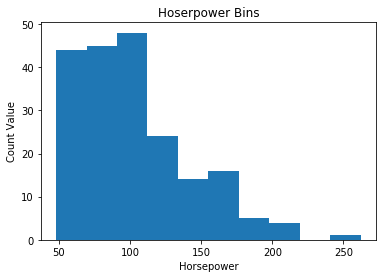

In [122]:
%matplotlib inline
# plot as histogram
plt.pyplot.hist(df['horsepower'])

# set x-axis, y-axis labels and title
plt.pyplot.xlabel('Horsepower')
plt.pyplot.ylabel('Count Value')
plt.pyplot.title('Hoserpower Bins')

In [124]:
# Group of bins, separate it to 3 categories, low, medium, high
# thus we need 4 points (3 intervals)

bins = np.linspace(min(df['horsepower']),max(df['horsepower']),4)
cat_name = ['Low','Medium','High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels = cat_name, include_lowest = True)
df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
10,101,Low


In [125]:
# See the number in each bin
df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'Horsepower Bins')

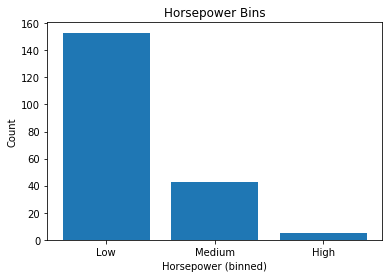

In [128]:
%matplotlib inline
pyplot.bar(cat_name, df['horsepower-binned'].value_counts())

plt.pyplot.xlabel('Horsepower (binned)')
plt.pyplot.ylabel('Count')
plt.pyplot.title('Horsepower Bins')

Text(0.5, 1.0, 'Horsepower Bins')

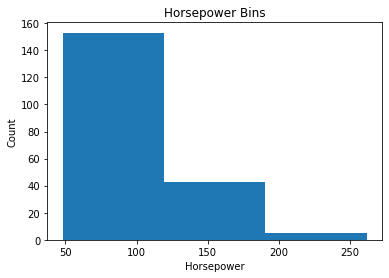

In [130]:
# Alternatively, we can visualise the original horsepower value in bins
plt.pyplot.hist(df['horsepower'], bins=3)

plt.pyplot.xlabel('Horsepower')
plt.pyplot.ylabel('Count')
plt.pyplot.title('Horsepower Bins')

In [135]:
# Now, we can change some categorical values to quantitative value
# using pd.get_dummies()
dummy_var1 = pd.get_dummies(df['fuel-type'])

# Rename for clarity
dummy_var1.rename(columns={'diesel':'fuel-type-diesel','gas':'fuel-type-gas'},inplace=True)

dummy_var1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [141]:
# Merge the columns using pd.concat()
# df = pd.concat([df, dummy_var1], axis=1)
df.drop('fuel-type',axis = 1, inplace = True)

In [142]:
df.head()

,aspiration,body-style,bore,city-L/100KM,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,std,convertible,3.47,11.190476,9.0,2548.0,rwd,front,130.0,dohc,...,alfa-romero,122.0,four,two,5000.0,13495.0,2.68,3.0,88.6,0.890278
1,std,convertible,3.47,11.190476,9.0,2548.0,rwd,front,130.0,dohc,...,alfa-romero,122.0,four,two,5000.0,16500.0,2.68,3.0,88.6,0.890278
2,std,hatchback,2.68,12.368421,9.0,2823.0,rwd,front,152.0,ohcv,...,alfa-romero,122.0,six,two,5000.0,16500.0,3.47,1.0,94.5,0.909722
3,std,sedan,3.19,9.791667,10.0,2337.0,fwd,front,109.0,ohc,...,audi,164.0,four,four,5500.0,13950.0,3.40,2.0,99.8,0.919444
4,std,sedan,3.19,13.055556,8.0,2824.0,4wd,front,136.0,ohc,...,audi,164.0,five,four,5500.0,17450.0,3.40,2.0,99.4,0.922222


In [143]:
df['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [146]:
# Do the same for 'aspiration'
dummy_var2 = pd.get_dummies(df['aspiration'])
dummy_var2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'}, inplace = True)
dummy_var2.head()


,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [147]:
df = pd.concat([df,dummy_var2],axis=1)

,aspiration,body-style,bore,city-L/100KM,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width,aspiration-std,aspiration-turbo
0,std,convertible,3.47,11.190476,9.0,2548.0,rwd,front,130.0,dohc,...,four,two,5000.0,13495.0,2.68,3.0,88.6,0.890278,1,0
1,std,convertible,3.47,11.190476,9.0,2548.0,rwd,front,130.0,dohc,...,four,two,5000.0,16500.0,2.68,3.0,88.6,0.890278,1,0
2,std,hatchback,2.68,12.368421,9.0,2823.0,rwd,front,152.0,ohcv,...,six,two,5000.0,16500.0,3.47,1.0,94.5,0.909722,1,0
3,std,sedan,3.19,9.791667,10.0,2337.0,fwd,front,109.0,ohc,...,four,four,5500.0,13950.0,3.40,2.0,99.8,0.919444,1,0
4,std,sedan,3.19,13.055556,8.0,2824.0,4wd,front,136.0,ohc,...,five,four,5500.0,17450.0,3.40,2.0,99.4,0.922222,1,0


In [149]:
df.drop('aspiration', axis = 1, inplace = True)

In [153]:
df.head()

,body-style,bore,city-L/100KM,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,fuel-system,...,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width,aspiration-std,aspiration-turbo
0,convertible,3.47,11.190476,9.0,2548.0,rwd,front,130.0,dohc,mpfi,...,four,two,5000.0,13495.0,2.68,3.0,88.6,0.890278,1,0
1,convertible,3.47,11.190476,9.0,2548.0,rwd,front,130.0,dohc,mpfi,...,four,two,5000.0,16500.0,2.68,3.0,88.6,0.890278,1,0
2,hatchback,2.68,12.368421,9.0,2823.0,rwd,front,152.0,ohcv,mpfi,...,six,two,5000.0,16500.0,3.47,1.0,94.5,0.909722,1,0
3,sedan,3.19,9.791667,10.0,2337.0,fwd,front,109.0,ohc,mpfi,...,four,four,5500.0,13950.0,3.40,2.0,99.8,0.919444,1,0
4,sedan,3.19,13.055556,8.0,2824.0,4wd,front,136.0,ohc,mpfi,...,five,four,5500.0,17450.0,3.40,2.0,99.4,0.922222,1,0


In [163]:
# sort based on the column name
col_sorted = df.columns.sort_values().tolist()
df = df[col_sorted]
df.head()

,aspiration-std,aspiration-turbo,body-style,bore,city-L/100KM,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,1,0,convertible,3.47,11.190476,9.0,2548.0,rwd,front,130.0,...,alfa-romero,122.0,four,two,5000.0,13495.0,2.68,3.0,88.6,0.890278
1,1,0,convertible,3.47,11.190476,9.0,2548.0,rwd,front,130.0,...,alfa-romero,122.0,four,two,5000.0,16500.0,2.68,3.0,88.6,0.890278
2,1,0,hatchback,2.68,12.368421,9.0,2823.0,rwd,front,152.0,...,alfa-romero,122.0,six,two,5000.0,16500.0,3.47,1.0,94.5,0.909722
3,1,0,sedan,3.19,9.791667,10.0,2337.0,fwd,front,109.0,...,audi,164.0,four,four,5500.0,13950.0,3.40,2.0,99.8,0.919444
4,1,0,sedan,3.19,13.055556,8.0,2824.0,4wd,front,136.0,...,audi,164.0,five,four,5500.0,17450.0,3.40,2.0,99.4,0.922222


In [181]:
# Sort value based on a single column
# df.sort_values(df.columns.values.tolist(), axis = 0, ascending=False, inplace=True)
df.sort_values(['price'], axis = 0, ascending=False, inplace=True)
df.head(10)


,aspiration-std,aspiration-turbo,body-style,bore,city-L/100KM,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
74,1,0,hardtop,3.80,16.785714,8.0,3715.0,rwd,front,304.0,...,mercedes-benz,122.0,eight,two,4500.0,45400.0,3.35,1.0,112.0,1.000000
16,1,0,sedan,3.62,14.687500,8.0,3380.0,rwd,front,209.0,...,bmw,122.0,six,two,5400.0,41315.0,3.39,0.0,103.5,0.943056
73,1,0,sedan,3.80,16.785714,8.0,3900.0,rwd,front,308.0,...,mercedes-benz,122.0,eight,four,4500.0,40960.0,3.35,0.0,120.9,0.995833
128,1,0,convertible,3.74,13.823529,9.5,2800.0,rwd,rear,194.0,...,porsche,122.0,six,two,5900.0,37028.0,2.90,3.0,89.5,0.902778
17,1,0,sedan,3.62,15.666667,8.0,3505.0,rwd,front,209.0,...,bmw,122.0,six,four,5400.0,36880.0,3.39,0.0,110.0,0.984722
49,1,0,sedan,3.54,18.076923,11.5,3950.0,rwd,front,326.0,...,jaguar,122.0,twelve,two,5000.0,36000.0,2.76,0.0,102.0,0.980556
48,1,0,sedan,3.63,15.666667,8.1,4066.0,rwd,front,258.0,...,jaguar,122.0,six,four,4750.0,35550.0,4.17,0.0,113.0,0.966667
72,1,0,convertible,3.46,14.687500,8.3,3685.0,rwd,front,234.0,...,mercedes-benz,142.0,eight,two,4750.0,35056.0,3.10,3.0,96.6,0.979167
71,1,0,sedan,3.46,14.687500,8.3,3740.0,rwd,front,234.0,...,mercedes-benz,122.0,eight,four,4750.0,34184.0,3.10,-1.0,115.6,0.995833
127,1,0,hardtop,3.74,13.823529,9.5,2756.0,rwd,rear,194.0,...,porsche,122.0,six,two,5900.0,34028.0,2.90,3.0,89.5,0.902778


In [182]:
df.to_csv('YD-practise-df-sorted-price.csv')